# cross_valid.py

In [1]:
from sklearn.model_selection import StratifiedKFold
import pickle as pkl
import pandas as pd
import glog as log
import numpy as np


def rankFeatures(clf, featureNames, top=10):
    """Given a trained classifier that is able to rank features,
    sort the feature names in @featureNames, and print several top features.
    Args:
        cls: a fitted classifier having the scores of feature importances.
        featureNames: names of the features.
        top: how many top features to print to the stdout.
    Returns:
        sortedFeatures, feature names sorted by its importance.
        sortedFeatureImportances, the scores for each item in sortedFeatures.
    """
    raise NotImplementedError()


def crossValidate(clf, X, Y, featureNames, trainFunc, fold=5):
    """Cross validate using stratified k-fold split.
    Args:
        clf: a sklearn classifier of any type.
        (X, Y): feature matrix and label vector from the dataset.
        featureNames: column names of @X.
        tranFunc: a function object that implements how to fit the @clf.
        fold: number of fold to run for cross validation.
    Returns:
        Metrics on each validation fold as a dictionary, e.g.
            result['ValidAccuList'] = [accu_1, accu_2, ..., accu_k]
            result['ValidLossList'] = [loss_1, loss_2, ..., loss_k]
            ...
    """
    
    
    raise NotImplementedError()

# Raw Data Processing

## Description
In this section, We will analyze columns contained in the Microsoft document and apply techniques to preprocess the data into useful descriptive values for our classifiers.

In [2]:
#Handy functions

#Imports
from sklearn.model_selection import StratifiedKFold
import pickle as pkl
import pandas as pd
import glog as log
import numpy as np

import os
def bashing(command):
    
    os.system(command + " > bashFile")
    with open("bashFile") as f:
        for line in f.readlines():
            print(line[:-1])

def readData(path):
    data = pd.read_csv(path)
    return data
def implementAllPolicies(functionName=None):
    import policiesImplementation as policy
    train = readData('train_samples.csv')
    if functionName:
        method_to_call = getattr(policy , str(functionName))
        return method_to_call(train)
    modifiedTrain = pd.DataFrame()
    for field in train.columns:
        try:
            method_to_call = getattr(policy , "policy_"+str(field))
            newColumns = method_to_call(train)
        except Exception as ex:
            template = "{0} occurred. while processing "+ str(field)+"policy :\n\t{1!r}"
            message = template.format(type(ex).__name__, ex.args)
            print (message) 
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [3]:
train = readData('train_samples.csv')

In [484]:
from sklearn.model_selection import KFold
def accuracy_score(truth, predicted):
    """ Compute accuracy of predictions.
    DONE ALREADY
    Params:
      truth.......array of true labels (0 or 1)
      predicted...array of predicted labels (0 or 1)
    """
    return len(np.where(truth==predicted)[0]) / len(truth)


def cross_validation_accuracy(clf, X, labels, k):
    """
    Compute the average testing accuracy over k folds of cross-validation. You
    can use sklearn's KFold class here (no random seed, and no shuffling
    needed).

    Params:
      clf......A LogisticRegression classifier.
      X........A csr_matrix of features.
      labels...The true labels for each instance in X
      k........The number of cross-validation folds.

    Returns:
      The average testing accuracy of the classifier
      over each fold of cross-validation.
    """
    cv = KFold(n_splits=k)
    accuracies = []
    t=0
    for train_idx, test_idx in cv.split(X):
        clf.fit(X.iloc[train_idx,:], labels[train_idx])
        predicted = clf.predict(X.iloc[test_idx,:])
        acc = accuracy_score(labels[test_idx], predicted)
        accuracies.append(acc)
    avg = np.mean(accuracies)
    print(accuracies)
    return avg
def countNan(series):
    c=0
    for val in series:
        if str(val) == 'nan':
            c+=1
    return c

In [6]:
from sklearn.impute import SimpleImputer 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
train = readData("train_samples.csv")
Y = train[train.columns[-1]]
train=train[train.columns[41:-1]]
most_frequents = ['Census_OSInstallLanguageIdentifier']
medians =['Census_TotalPhysicalRAM',
                 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                 'Census_InternalPrimaryDisplayResolutionHorizontal',
                'Census_InternalPrimaryDisplayResolutionVertical']
means = ['Census_SystemVolumeTotalCapacity',
         'Census_PrimaryDiskTotalCapacity']
imputeAs={'Census_IsFlightsDisabled':1,
          'Census_ThresholdOptIn' :- 1,
          'Census_IsWIMBootEnabled':1,
         'Census_IsVirtualDevice':0.0,
         'Census_IsAlwaysOnAlwaysConnectedCapable':-1,
         'Wdft_IsGamer':2}
imputer = SimpleImputer(strategy='mean')
train[means]=imputer.fit_transform(train[means])
imputer = SimpleImputer(strategy='median')
train[medians]=imputer.fit_transform(train[medians])
imputer = SimpleImputer(strategy='most_frequent')
train[most_frequents]=imputer.fit_transform(train[most_frequents])
for field, replaceValue in imputeAs.items():
    imputer = SimpleImputer(strategy='constant',fill_value=replaceValue)
    train[field]=imputer.fit_transform(train[[field]])
columns2Ignore=['Census_ProcessorClass',
                'Census_InternalBatteryType',
                'Census_InternalBatteryNumberOfCharges',
                'Census_OSVersion',
               'Census_IsFlightingInternal',
               'Census_FirmwareVersionIdentifier']
train['Census_OSEdition'] = [x if x in ['Core' ,'CoreCountrySpecific','CoreSingleLanguage', 'Professional'] else 'Other' for x in train['Census_OSEdition'] ] 
train['Census_OSBranch'] = [x if x in ['rs1_release','rs2_release','rs3_release','rs3_release_svc_escrow','rs4_release','th1_st1','th2_release','th2_release_sec' ] else 'Other' for x in train['Census_OSBranch'] ]
train['Census_PowerPlatformRoleName'] = [x if x in ['Desktop','Mobile'] else 'Other' for x in train['Census_PowerPlatformRoleName'] ]
train['Census_ChassisTypeName'] = [x if x in ['AllinOne','Laptop','Notebook','Desktop','Portable'] else 'Other' for x in train['Census_ChassisTypeName'] ]
train['Census_PrimaryDiskTypeName'] = [x if x in ['HDD','SSD'] else 'Other' for x in train['Census_PrimaryDiskTypeName'] ]


train = train.drop(labels=columns2Ignore,axis=1)
columns2Dummy=['Census_PrimaryDiskTypeName',
               'Census_ChassisTypeName',
               'Census_PowerPlatformRoleName',
               'Census_OSArchitecture',
              'Census_OSBuildNumber',
              'Census_OSBuildRevision',
              'Census_OSEdition',
              'Census_OSBranch',
               'Census_OSSkuName',
              'Census_OSInstallTypeName',
              'Census_OSInstallLanguageIdentifier',
              'Census_OSWUAutoUpdateOptionsName',
              'Census_GenuineStateName',
              'Census_ActivationChannel',
              'Census_FlightRing',
               'Wdft_RegionIdentifier',
               'Census_FirmwareManufacturerIdentifier'
              ]

X = dummy_df(df=train,todummy_list = columns2Dummy)
clf = tree.DecisionTreeClassifier() #RandomForestClassifier()
k=5
for column in X.columns:
    if countNan(X[column]):
        print("Column : " + column + " has NaNs")

t=0
#accuracies = []
#for x in combinations(X.columns,40):
#    acc = cross_validation_accuracy(clf, X[list(x)], Y, k)
#    with open('accuracies','a') as f:
#        f.write(str(acc) + ",".join(list(x)) + "\n")
#    accuracies.append(acc)



In [482]:

train=readData('train_samples.csv')
conv2Int=['AVProductStatesIdentifier',
         'DefaultBrowsersIdentifier',
         'AVProductsInstalled',
         'AVProductsEnabled',
          'CityIdentifier',
         'OrganizationIdentifier',
         'GeoNameIdentifier',
         'IsProtected',
         'IeVerIdentifier',
         'Firewall',
         'Census_OEMNameIdentifier',
         'Census_OEMModelIdentifier',
         'Census_ProcessorCoreCount',
         'Census_ProcessorManufacturerIdentifier',
         'Census_ProcessorModelIdentifier']
categMap={'CountryIdentifier':9,
          'EngineVersion':4,
          'AppVersion':5,
          'AvSigVersion':6,
          'DefaultBrowsersIdentifier':4,
          'AVProductStatesIdentifier':6,
          'CityIdentifier':7,
          'OrganizationIdentifier':6,
          'GeoNameIdentifier':8,
          'LocaleEnglishNameIdentifier':12,
          'OsBuildLab':12,
          'IeVerIdentifier':14,
          'Census_OEMNameIdentifier':10,
          'Census_OEMModelIdentifier':4,
          'Census_ProcessorModelIdentifier':15
         }
columns2Ignore=['MachineIdentifier','IsBeta','AutoSampleOptIn','PuaMode','SMode','UacLuaenable',
               'Census_DeviceFamily',
                'Census_ProcessorClass',
                'Census_InternalBatteryType',
                'Census_InternalBatteryNumberOfCharges',
                'Census_OSVersion',
               'Census_IsFlightingInternal',
               'Census_FirmwareVersionIdentifier']
columns2Dummy=['ProductName',
               'Platform',
               'Processor',
               'OsVer',
               'OsBuild',
               'OsSuite',
               'OsPlatformSubRelease',
               'SkuEdition',
               'SmartScreen',
               'Census_MDC2FormFactor',
               'Census_PrimaryDiskTypeName',
               'Census_ChassisTypeName',
               'Census_PowerPlatformRoleName',
               'Census_OSArchitecture',
              'Census_OSBuildNumber',
              'Census_OSBuildRevision',
              'Census_OSEdition',
              'Census_OSBranch',
               'Census_OSSkuName',
              'Census_OSInstallTypeName',
              'Census_OSInstallLanguageIdentifier',
              'Census_OSWUAutoUpdateOptionsName',
              'Census_GenuineStateName',
              'Census_ActivationChannel',
              'Census_FlightRing',
               'Wdft_RegionIdentifier',
               'Census_FirmwareManufacturerIdentifier'
              ]
most_frequents = ['Census_OSInstallLanguageIdentifier','AVProductStatesIdentifier','GeoNameIdentifier']
medians =['Census_TotalPhysicalRAM',
                 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                 'Census_InternalPrimaryDisplayResolutionHorizontal',
                'Census_InternalPrimaryDisplayResolutionVertical']
means = ['Census_SystemVolumeTotalCapacity',
         'Census_PrimaryDiskTotalCapacity']
imputeAs={'Census_IsFlightsDisabled':1,
          'Census_ThresholdOptIn' :- 1,
          'Census_IsWIMBootEnabled':1,
         'Census_IsVirtualDevice':0.0,
         'Census_IsAlwaysOnAlwaysConnectedCapable':-1,
         'Wdft_IsGamer':2,
         'DefaultBrowsersIdentifier':1,
           'AVProductStatesIdentifier':1,
           'AVProductsEnabled':2.0,
           'AVProductsInstalled':3.0,
         'RtpStateBitfield':7.5,
         'CityIdentifier':0,
         'OrganizationIdentifier':0,
         'IsProtected':-1,
         'IeVerIdentifier':0,
         'SmartScreen':'unknown',
         'Firewall':-1,
         'Census_OEMNameIdentifier':0,
         'Census_OEMModelIdentifier':0,
         'Census_ProcessorCoreCount':0,
         'Census_ProcessorManufacturerIdentifier':0,
         'Census_ProcessorModelIdentifier':0}
imputer = SimpleImputer(strategy='mean')
train[means]=imputer.fit_transform(train[means])
imputer = SimpleImputer(strategy='median')
train[medians]=imputer.fit_transform(train[medians])
imputer = SimpleImputer(strategy='most_frequent')
train[most_frequents]=imputer.fit_transform(train[most_frequents])

train['Census_OSEdition'] = [x if x in ['Core' ,'CoreCountrySpecific','CoreSingleLanguage', 'Professional'] else 'Other' for x in train['Census_OSEdition'] ] 
train['Census_OSBranch'] = [x if x in ['rs1_release','rs2_release','rs3_release','rs3_release_svc_escrow','rs4_release','th1_st1','th2_release','th2_release_sec' ] else 'Other' for x in train['Census_OSBranch'] ]
train['Census_PowerPlatformRoleName'] = [x if x in ['Desktop','Mobile'] else 'Other' for x in train['Census_PowerPlatformRoleName'] ]
train['Census_ChassisTypeName'] = [x if x in ['AllinOne','Laptop','Notebook','Desktop','Portable'] else 'Other' for x in train['Census_ChassisTypeName'] ]
train['Census_PrimaryDiskTypeName'] = [x if x in ['HDD','SSD'] else 'Other' for x in train['Census_PrimaryDiskTypeName'] ]


for field, replaceValue in imputeAs.items():
    imputer = SimpleImputer(strategy='constant',fill_value=replaceValue)
    train[field]=imputer.fit_transform(train[[field]])
for field in conv2Int:
    train[field]=[int(x) for x in train[field]]
train = train.drop(labels=columns2Ignore,axis=1)
train = dummy_df(df=train,todummy_list = columns2Dummy)
for category, mapping in categMap.items():
    train=categoricalMapping(train,field=category,k=mapping)

#accuracies = []
#for x in combinations(X.columns,40):
#    acc = cross_validation_accuracy(clf, X[list(x)], Y, k)
#    with open('accuracies','a') as f:
#        f.write(str(acc) + ",".join(list(x)) + "\n")
#    accuracies.append(acc)








def printValues(df,field,value,onlyPercentage=False):
    t=0
    idx=[]
    s=0
    for val in train[field]:
        if str(val)==str(value):
            idx.append(t)
            if df.iloc[t,-1] == 1:
                s+=1
        t+=1
    print(field,"has ",str(s/float(len(idx))),"detections for ",len(idx),"observations")
    if onlyPercentage:
        return
    print(df.iloc[idx,:].head(len(idx)))
def compare(df,fieldVal):
    for field,val in fieldVal.items():
        c = df[df[field]==val].HasDetections
        if len(c)==0:
            print(field,"has ",str(sum(c))+"/"+str(float(len(c))),"detections for ",len(c),"observations",fieldVal)
        else:
            print(field,"has ",str(sum(c)/float(len(c))),"detections for ",len(c),"observations",fieldVal)

def categoricalMapping(df,field,k=5):
    """
    Creates a categorical mapping, it will rewrite the field
    in the dataframe with values from 0 to k-1 where
    the 0 has less amount of detections while the k-1 has
    the highest detection rate. This function is an effort
    to keep the variance of the categorical variables
    Please make sure to delete all NaN values beforehand
    #TODO:
        implement a different treatment of singleton nodes

    Params:
      df.......The dataframe that will be modified
      field....The field of the dataframe column name
      k .......The number of values that the answer will map into
    Returns:
      df.......The modified df
      mapping..A mapping dictionary with the 0-(k-1) values 
               in which each value has a list with the old
                values that where map into each new value

    """
    from collections import defaultdict
    dictValues = defaultdict(lambda: [0,0])
    t=0
    for value in df[field]:
        dictValues[value]=(dictValues[value][0] + 1 , dictValues[value][1] + df.iloc[t,-1]) 
        t+=1
    answer=[]
    singletons=[]
    singles=0
    stot=0
    for key,(tot,par) in dictValues.items():
        stot+=tot
        if tot==1:
            singletons.append(key)
            singles+=par
        else:
            answer.append(([key],par/float(tot)))
    if len(singletons):
        answer.append((singletons,singles/len(singletons)))
    lim=0
    t=0
    dictValues = defaultdict(lambda: [])
    answer = sorted(answer,key=lambda x:x[1])
    for (item,pers) in answer:
        dictValues[int(t/(len(answer)/k))].extend(item)
        t+=1
    df[field]
    finalAnswer=[]
    for x in df[field]:
        for key,vals in dictValues.items():
            if x in vals:
                finalAnswer.append(key)
                break
    if len(finalAnswer) != len(df[field]):
        print('make Sure there are not nan values')
    else:
        df[field]=finalAnswer
        return df

In [485]:
clf = tree.DecisionTreeClassifier() #RandomForestClassifier()
k=5
Y = train[train.columns[-1]]
X=train[train.columns[:-1]]
for column in X.columns:
    if countNan(X[column]):
        print("Column : " + column + " has NaNs")

t=0
acc = cross_validation_accuracy(clf, X, Y, k)
print(acc)

[0.99875, 1.0, 0.995, 1.0, 0.9937421777221527]
0.9974984355444306


0.9979984355444305


In [7]:
len(X.columns)

371

In [125]:
max(accuracies)

0.5403848560700876

In [114]:
print(X[list(x)])

      Census_PrimaryDiskTotalCapacity  Census_SystemVolumeTotalCapacity  \
0                        4.769400e+05                     299451.000000   
1                        4.769400e+05                     102385.000000   
2                        1.144730e+05                     113907.000000   
3                        2.384750e+05                     227116.000000   
4                        4.769400e+05                     101900.000000   
5                        1.144730e+05                     113671.000000   
6                        4.769400e+05                     458702.000000   
7                        3.052450e+05                     290807.000000   
8                        3.052450e+05                     303892.000000   
9                        9.538690e+05                     203252.000000   
10                       1.216760e+05                     120786.000000   
11                       1.221040e+05                     120827.000000   
12                       

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [70]:
clf.fit(X,Y)

W0322 14:45:18.564033 4571 forest.py:246] /home/mainuser/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
train[train.columns[40:-1]]

,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,...,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
41,2523.0,476940.0,HDD,205240.000000,0,6144.0,Notebook,17.3,1600.0,900.0,...,0.0,556.0,0,0.0,0.0,0,0,0.0,0.0,3.0
42,2527.0,238475.0,SSD,229730.000000,0,8192.0,Portable,14.0,1600.0,900.0,...,0.0,355.0,0,0.0,0.0,0,0,0.0,0.0,13.0
43,2280.0,114473.0,SSD,78126.000000,0,4096.0,Notebook,15.5,1366.0,768.0,...,-1.0,500.0,0,1.0,0.0,0,0,0.0,0.0,3.0
44,2523.0,476940.0,HDD,307285.000000,0,8192.0,Notebook,15.5,1366.0,768.0,...,-1.0,142.0,1,1.0,0.0,0,0,0.0,1.0,7.0
45,128.0,715404.0,HDD,404243.000000,0,4096.0,Notebook,15.5,1366.0,768.0,...,-1.0,556.0,1,1.0,0.0,0,0,0.0,1.0,11.0
46,2737.0,122104.0,SSD,121027.000000,0,8192.0,Notebook,15.5,1920.0,1080.0,...,-1.0,142.0,1,1.0,0.0,0,0,0.0,0.0,7.0
47,1984.0,476940.0,HDD,453385.000000,0,4096.0,Notebook,11.6,1366.0,768.0,...,0.0,554.0,1,0.0,0.0,1,0,0.0,0.0,1.0
48,39.0,953869.0,HDD,952342.000000,0,8192.0,Notebook,17.3,1680.0,1050.0,...,-1.0,554.0,1,1.0,0.0,0,0,0.0,0.0,11.0
49,2962.0,1907729.0,HDD,257050.000000,0,8192.0,Other,15.5,1366.0,768.0,...,0.0,500.0,0,0.0,0.0,0,0,0.0,0.0,11.0
50,2890.0,239372.0,SSD,119962.000000,0,16384.0,Notebook,15.4,1680.0,1050.0,...,-1.0,NaN,0,1.0,0.0,0,0,0.0,1.0,10.0


41      1
42      1
43      1
44      1
45      1
46      0
47      1
48      1
49      0
50      0
51      0
52      1
53      1
54      1
55      0
56      1
57      0
58      0
59      0
60      1
61      1
62      1
63      0
64      0
65      0
66      0
67      1
68      1
69      1
70      0
       ..
3969    0
3970    0
3971    0
3972    1
3973    1
3974    0
3975    0
3976    0
3977    0
3978    0
3979    0
3980    1
3981    1
3982    0
3983    0
3984    0
3985    0
3986    0
3987    1
3988    0
3989    0
3990    0
3991    1
3992    0
3993    1
3994    1
3995    0
3996    1
3997    1
3998    0
Name: HasDetections, Length: 3958, dtype: int64

In [26]:
implementAllPolicies()

AttributeError occurred. while processing MachineIdentifierpolicy :
	("module 'policiesImplementation' has no attribute 'policy_MachineIdentifier'",)
AttributeError occurred. while processing ProductNamepolicy :
	("module 'policiesImplementation' has no attribute 'policy_ProductName'",)
AttributeError occurred. while processing EngineVersionpolicy :
	("module 'policiesImplementation' has no attribute 'policy_EngineVersion'",)
AttributeError occurred. while processing AppVersionpolicy :
	("module 'policiesImplementation' has no attribute 'policy_AppVersion'",)
AttributeError occurred. while processing AvSigVersionpolicy :
	("module 'policiesImplementation' has no attribute 'policy_AvSigVersion'",)
AttributeError occurred. while processing IsBetapolicy :
	("module 'policiesImplementation' has no attribute 'policy_IsBeta'",)
AttributeError occurred. while processing RtpStateBitfieldpolicy :
	("module 'policiesImplementation' has no attribute 'policy_RtpStateBitfield'",)
AttributeError occ

## Census_ProcessorClass
### Column [41]
### Type :
    Categorical (mid, low, high)

### Observation:
    29 elements out of 4000 elements (0.0725%) actually contain values, rest of them are "NaN"

### Policy:
    Ignore this column for at least the first iteration.

In [12]:
getattr?

In [18]:
callByname('policy_Census_ProcessorClass')

function called


In [64]:
newTrain = dummy_df(train,['Census_ProcessorClass']) 

In [65]:
newTrain

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_ProcessorClass_high,Census_ProcessorClass_low,Census_ProcessorClass_mid
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,10.0,0,0,0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,8.0,0,0,0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,3.0,0,0,0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,3.0,1,0,0,0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,1.0,1,0,0,0
5,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,15.0,1,0,0,0
6,0000161e8abf8d8b89c5ab8787fd712b,win8defender,1.1.15100.1,4.18.1807.18075,1.273.845.0,0,7.0,0,NaN,43927.0,...,0.0,0,0,0.0,0.0,10.0,1,0,0,0
7,000019515bc8f95851aff6de873405e8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1393.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,15.0,0,0,0,0
8,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,NaN,53447.0,...,0.0,0,0,0.0,0.0,15.0,0,0,0,0
9,00001a18d69bb60bda9779408dcf02ac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.973.0,0,7.0,0,NaN,46413.0,...,0.0,0,0,0.0,1.0,8.0,1,0,0,0


In [7]:
train.columns[41]
t = train.dtypes[41]
len(train.Census_ProcessorClass[[str(val)!='nan' for val  in train.Census_ProcessorClass]])
print(train.Census_ProcessorClass.groupby(train.Census_ProcessorClass).count())

Census_ProcessorClass
high     3
low      7
mid     19
Name: Census_ProcessorClass, dtype: int64


## Census_PrimaryDiskTotalCapacity
### Column [42]
### Type :
    Float

### Observation:
    Only 19 observations are missing

### Policy:
    Fill the missing values with the mean

NameError: name 'train' is not defined

In [45]:

def policy_Census_PrimaryDiskTotalCapacity(data):
    imputer = SimpleImputer(missing_values = 'NaN', strategy = 'mean')
    imputer = imputer.fit(data['Census_PrimaryDiskTotalCapacity'])
    data['Census_PrimaryDiskTotalCapacity'] = imputer.transform(data['Census_PrimaryDiskTotalCapacity'])
    #X = data['Census_PrimaryDiskTotalCapacity']
    #X.reshape(-1, 1)
    #imp = SimpleImputer(missing_values='NaN', strategy='mean')
    #imp.fit(pd.DataFrame(X))
    #X = pd.DataFrame(data=imp.transform(X),columns= )
    return data['Census_PrimaryDiskTotalCapacity']

In [46]:
#print(train['Census_PrimaryDiskTotalCapacity'])
print(policy_Census_PrimaryDiskTotalCapacity(train))

ValueError: Expected 2D array, got 1D array instead:
array=[476940. 476940. 114473. ... 244198. 476940. 953869.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
train.Census_PrimaryDiskTotalCapacity.plot.hist()

def policy42():
    train.columns[42]
    newSerie = train.Census_PrimaryDiskTotalCapacity[[str(val)=='nan' for val in train.Census_PrimaryDiskTotalCapacity]]
    len(newSerie)
    print(newSerie)

## Census_PrimaryDiskTypeName
### Column [43]
### Type :
    Categorical (HDD, SSD, UNKNOWN , Unspecified)

### Observation:
    Distribution
    HDD            2559
    SSD            1130
    UNKNOWN         157
    Unspecified     150

### Policy:
    Join Unknown and Unspecified into 'Others' and then 

In [9]:
from sklearn.preprocessing import Imputer
Imputer?

In [66]:
train['Census_PrimaryDiskTypeName'] = [x if x in ['HDD','SSD'] else 'Other' for x in train['Census_PrimaryDiskTypeName'] ]


,Census_SystemVolumeTotalCapacity,Census_PrimaryDiskTypeName
0,299451.0,HDD
1,102385.0,HDD
2,113907.0,SSD
3,227116.0,UNKNOWN
4,101900.0,HDD
5,113671.0,SSD
6,458702.0,HDD
7,290807.0,HDD
8,303892.0,HDD
9,203252.0,HDD


In [67]:
print(train.Census_PrimaryDiskTypeName.groupby(train.Census_PrimaryDiskTypeName).count())



Census_PrimaryDiskTypeName
HDD      2559
Other     310
SSD      1130
Name: Census_PrimaryDiskTypeName, dtype: int64


In [13]:
for x in range(0,43):
    text=text +("## "+train.columns[x] +
          "\n### Column["+str(x)+"]\n" +
          "### Type:\n\n\n"+
            "### Observations:\n\n\n" + 
                     "### Policy:\n\n\n")
print(text)
        

## Census_PrimaryDiskTotalCapacity
### Column[42]
### Type:


### Observations:


### Policy:


## MachineIdentifier
### Column[0]
### Type:


### Observations:


### Policy:


## ProductName
### Column[1]
### Type:


### Observations:


### Policy:


## EngineVersion
### Column[2]
### Type:


### Observations:


### Policy:


## AppVersion
### Column[3]
### Type:


### Observations:


### Policy:


## AvSigVersion
### Column[4]
### Type:


### Observations:


### Policy:


## IsBeta
### Column[5]
### Type:


### Observations:


### Policy:


## RtpStateBitfield
### Column[6]
### Type:


### Observations:


### Policy:


## IsSxsPassiveMode
### Column[7]
### Type:


### Observations:


### Policy:


## DefaultBrowsersIdentifier
### Column[8]
### Type:


### Observations:


### Policy:


## AVProductStatesIdentifier
### Column[9]
### Type:


### Observations:


### Policy:


## AVProductsInstalled
### Column[10]
### Type:


### Observations:


### Policy:


## AVProductsEnabled
### Colu

## Census_SystemVolumeTotalCapacity
### Column[44]
### Type:
    Float


### Observations:
    Only has 19 NaN

### Policy:
    We will use Mean for NaN

Data has 0 NaNs


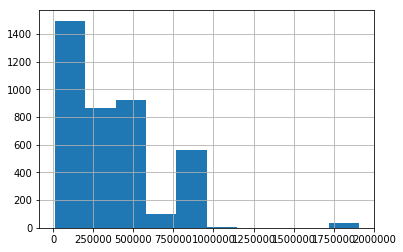

In [58]:

def countNan(series):
    c=0
    for val in series:
        if str(val) == 'nan':
            c+=1
    return c
train.Census_SystemVolumeTotalCapacity.hist()
print("Data has "+str(countNan(train.Census_SystemVolumeTotalCapacity))+" NaNs")


## Census_HasOpticalDiskDrive
### Column[45]
### Type:
    Boolean (int64) indicating whether a computer has an optical disk drive


### Observations:
    Distribution
    0    3670
    1     329

### Policy:
    This data should remain as it is

In [131]:
train.Census_HasOpticalDiskDrive.groupby(train.Census_HasOpticalDiskDrive).count()

Census_HasOpticalDiskDrive
0    3670
1     329
Name: Census_HasOpticalDiskDrive, dtype: int64

## Census_TotalPhysicalRAM
### Column[46]
### Type:
    Integer (float64) 


### Observations:
    Only 35 NaN in the Data

### Policy:
    We can use the Median to resolve NaN



Data contain 0 NaN


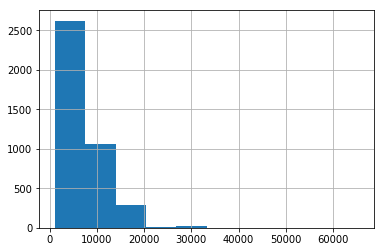

In [60]:
train.Census_TotalPhysicalRAM.hist()
print("Data contain " + str(countNan(train.Census_TotalPhysicalRAM)) + " NaN")


## Census_ChassisTypeName
### Column[47]
### Type:
    Categorical


### Observations:
    There are far too many different chassis. However, it may be really important to keep them separate since it seems important to know the type. Some types have a too small sample size so it would not generalize well
    
    DISTRIBUTION
    AllinOne                 79
    BusExpansionChassis       2
    Convertible              43
    Desktop                 864
    Detachable               26
    HandHeld                 21
    Laptop                  289
    LowProfileDesktop        22
    LunchBox                  2
    MainServerChassis         2
    MiniPC                    1
    MiniTower                34
    Notebook               2375
    Other                    31
    Portable                136
    RackMountChassis          1
    SpaceSaving              19
    SubNotebook               1
    Tablet                    3
    Tower                     9
    UNKNOWN                  31
    Unknown                   8

### Policy:
    Unknowns are going to become others and maybe we can create 5 categories. Notebook, Laptop, Desktop, Portable, and others


['Census_ProcessorClass', 'Census_PrimaryDiskTypeName']

In [144]:
train.Census_ChassisTypeName.groupby(train.Census_ChassisTypeName).count()

Census_ChassisTypeName
AllinOne                 79
BusExpansionChassis       2
Convertible              43
Desktop                 864
Detachable               26
HandHeld                 21
Laptop                  289
LowProfileDesktop        22
LunchBox                  2
MainServerChassis         2
MiniPC                    1
MiniTower                34
Notebook               2375
Other                    31
Portable                136
RackMountChassis          1
SpaceSaving              19
SubNotebook               1
Tablet                    3
Tower                     9
UNKNOWN                  31
Unknown                   8
Name: Census_ChassisTypeName, dtype: int64

## Census_InternalPrimaryDiagonalDisplaySizeInInches
### Column[48]
### Type:
    numeric (Float64) indicanding size in inches

### Observations:
    There are only 15 NaN values. There are a couple of outliers with 70 in as seen in the histogram. Maybe we can refine that in later iterations.

### Policy:
    It seems pretty safe to use the median to resolve the conflict with the missing values
    



Data has 15 NaNs


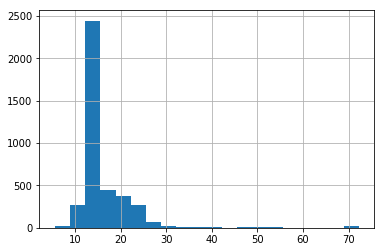

In [151]:
train.Census_InternalPrimaryDiagonalDisplaySizeInInches.hist(bins=20)
print("Data has "+str(countNan(train.Census_InternalPrimaryDiagonalDisplaySizeInInches)) + " NaNs")

## Census_InternalPrimaryDisplayResolutionHorizontal
### Column[49]
### Type:
    Numeric:

### Observations:
    Only 15 NaN


### Policy:
    We can use the Median to resolve missing values




15 NaNs


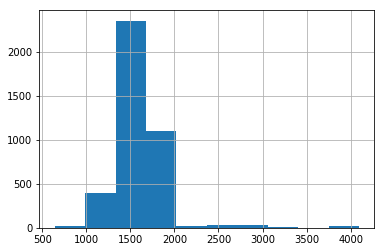

In [154]:
train.Census_InternalPrimaryDisplayResolutionHorizontal.hist()
print(str(countNan(train.Census_InternalPrimaryDisplayResolutionHorizontal))+" NaNs")

## Census_InternalPrimaryDisplayResolutionVertical
### Column[50]
### Type:
    Numeric:


### Observations:
    Only 15 NaN

### Policy:
    We can use the Median to resolve missing values





15 NaNs


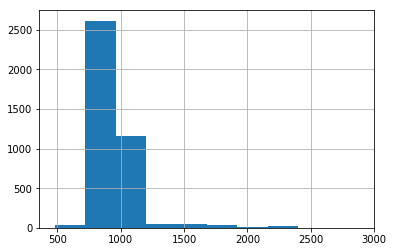

In [156]:
train.Census_InternalPrimaryDisplayResolutionVertical.hist()
print(str(countNan(train.Census_InternalPrimaryDisplayResolutionVertical))+" NaNs")

## Census_PowerPlatformRoleName
### Column[51]
### Type:
    Categorical

### Observations:
    DISTRIBUTION

    AppliancePC            4
    Desktop              936
    EnterpriseServer       4
    Mobile              2766
    SOHOServer            23
    Slate                214
    UNKNOWN               10
    Workstation           42

### Policy:
    We can divide it into 3 boolean columns




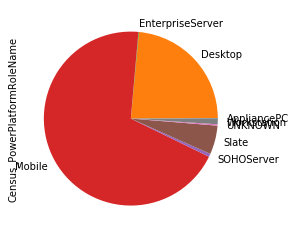

In [195]:
train.Census_PowerPlatformRoleName.groupby(train.Census_PowerPlatformRoleName).count().plot.pie()

## Census_InternalBatteryType
### Column[52]
### Type:
    Categorical

### Observations:
    Only about one forth of the records have data in this category

### Policy:
    We can ignore this column in the first iteration



In [169]:
print("Data has " + str(countNan(train.Census_InternalBatteryType)+ " NaN"))
train.Census_InternalBatteryType.groupby(train.Census_InternalBatteryType).count()

Data has 2825


Census_InternalBatteryType
#        87
li        1
li p     11
li-i    102
liio     15
lion    925
lip      24
nimh      1
pbac      3
real      2
unkn      2
vbox      1
Name: Census_InternalBatteryType, dtype: int64

## Census_InternalBatteryNumberOfCharges
### Column[53]
### Type:
    Integer

### Observations:
    This value can be of help, however there are 112 NaN and many zeroes. Also many large numbers that can be result of an error ""4.294967e+09    1015 ocurrences" and "0.000000e+00    2276 ocurrences"

### Policy:
    This value could be overlooked or it can be transform into a simple binary label.



W0321 16:42:01.901249 4987 ops.py:1649] /home/mainuser/.local/lib/python3.5/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)



Series([], Name: Census_InternalBatteryNumberOfCharges, dtype: float64)

112


Census_InternalBatteryNumberOfCharges
0.000000e+00    2276
1.000000e+00      28
2.000000e+00      19
3.000000e+00       6
4.000000e+00      11
5.000000e+00       6
6.000000e+00       4
7.000000e+00       7
8.000000e+00      10
9.000000e+00       7
1.000000e+01       3
1.100000e+01       5
1.200000e+01       3
1.300000e+01       6
1.400000e+01       5
1.500000e+01       8
1.600000e+01      18
1.700000e+01       7
1.800000e+01       3
1.900000e+01       1
2.000000e+01       4
2.100000e+01       5
2.200000e+01       3
2.300000e+01       2
2.400000e+01       2
2.500000e+01       4
2.600000e+01       6
2.700000e+01       2
2.800000e+01       2
2.900000e+01       3
                ... 
1.745000e+03       1
3.452000e+03       1
5.001000e+03       1
5.069000e+03       1
6.435000e+03       1
8.257000e+03       1
1.081900e+04       1
1.242600e+04       1
1.644800e+04       1
1.680700e+04       1
2.073700e+04       1
2.092000e+04       1
2.385100e+04       1
2.458800e+04       1
2.573200e+04     

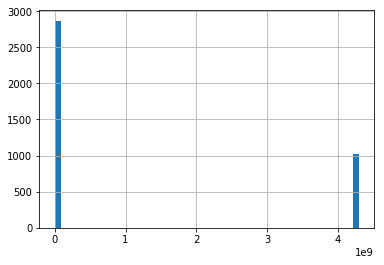

In [70]:
print(countNan(train.Census_InternalBatteryNumberOfCharges))
train.Census_InternalBatteryNumberOfCharges.hist(bins=50)
train.Census_InternalBatteryNumberOfCharges.groupby(train.Census_InternalBatteryNumberOfCharges).count()

112


Census_InternalBatteryNumberOfCharges
0.000000e+00    2276
1.000000e+00      28
2.000000e+00      19
3.000000e+00       6
4.000000e+00      11
5.000000e+00       6
6.000000e+00       4
7.000000e+00       7
8.000000e+00      10
9.000000e+00       7
1.000000e+01       3
1.100000e+01       5
1.200000e+01       3
1.300000e+01       6
1.400000e+01       5
1.500000e+01       8
1.600000e+01      18
1.700000e+01       7
1.800000e+01       3
1.900000e+01       1
2.000000e+01       4
2.100000e+01       5
2.200000e+01       3
2.300000e+01       2
2.400000e+01       2
2.500000e+01       4
2.600000e+01       6
2.700000e+01       2
2.800000e+01       2
2.900000e+01       3
                ... 
1.745000e+03       1
3.452000e+03       1
5.001000e+03       1
5.069000e+03       1
6.435000e+03       1
8.257000e+03       1
1.081900e+04       1
1.242600e+04       1
1.644800e+04       1
1.680700e+04       1
2.073700e+04       1
2.092000e+04       1
2.385100e+04       1
2.458800e+04       1
2.573200e+04     

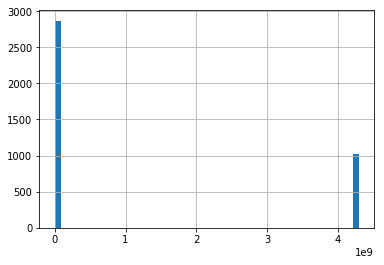

In [181]:
print(countNan(train.Census_InternalBatteryNumberOfCharges))
train.Census_InternalBatteryNumberOfCharges.hist(bins=50)
train.Census_InternalBatteryNumberOfCharges.groupby(train.Census_InternalBatteryNumberOfCharges).count()

## Census_OSVersion
### Column[54]
### Type:
    

### Observations:
    There are 158 different OS Versions in this dataset. They could be divided twice hierarchically
        example OS       Counts
    10.0.17134.137       35
    10.0.17134.165      395
    10.0.17134.167       42
    10.0.17134.191      114
    10.0.17134.228      642
    10.0.17134.254       50
    10.0.17134.285      181

### Policy:
    We can separate them by the field '17134' create columns in which the number is the subversion
    version		Count
    17760		1
    17134		1818
    10240		135
    17672		1
    14393		363
    15063		352
    17686		1
    10586		253
    17666		1
    16299		1070
    17692		2
    17744		2




In [201]:
versions={}
for version in train.Census_OSVersion:
    if version.split(".")[2] not in versions:
        versions[version.split(".")[2]] = 1
    else:
        versions[version.split(".")[2]] += 1
print("version"+"\t\t"+"Count")
for version, count in versions.items():
    
    print(str(version)+"\t\t"+str(count))

version		Count
17760		1
17134		1818
10240		135
17672		1
14393		363
15063		352
17686		1
10586		253
17666		1
16299		1070
17692		2
17744		2


In [197]:
train.Census_OSVersion.groupby(train.Census_OSVersion).count()


Census_OSVersion
10.0.10240.16384     12
10.0.10240.16397      1
10.0.10240.16405      4
10.0.10240.16413      1
10.0.10240.16601      1
10.0.10240.16725      1
10.0.10240.16942      1
10.0.10240.17113      1
10.0.10240.17202      1
10.0.10240.17236      2
10.0.10240.17354      1
10.0.10240.17394      1
10.0.10240.17443    103
10.0.10240.17889      1
10.0.10240.17914      2
10.0.10240.17946      2
10.0.10586.0         16
10.0.10586.1007       1
10.0.10586.104       14
10.0.10586.1045       4
10.0.10586.1106       8
10.0.10586.1176      69
10.0.10586.122        4
10.0.10586.14         3
10.0.10586.164       22
10.0.10586.17         1
10.0.10586.218       14
10.0.10586.29         5
10.0.10586.3          3
10.0.10586.318       20
                   ... 
10.0.16299.547      160
10.0.16299.551        2
10.0.16299.579        5
10.0.16299.611       84
10.0.16299.637        1
10.0.16299.64         6
10.0.16299.665       15
10.0.16299.666        5
10.0.16299.98         2
10.0.17134.1         57

## Census_OSArchitecture
### Column[55]
### Type:
    Categorical data

### Observations:

    Census_OSArchitecture
    amd64    3599
    arm64       1
    x86       399

### Policy:
    Separate them in 3 different columns




In [203]:
train.Census_OSArchitecture.groupby(train.Census_OSArchitecture).count()

Census_OSArchitecture
amd64    3599
arm64       1
x86       399
Name: Census_OSArchitecture, dtype: int64

## Census_OSBranch
### Column[56]
### Type:
    Categorical / it might be ordinal

### Observations:
    Census_OSBranch
    rs1_release                   363
    rs2_release                   352
    rs3_release                   553
    rs3_release_svc_escrow        512
    rs3_release_svc_escrow_im       5
    rs4_release                  1818
    rs5_release                     3
    rs_prerelease                   3
    rs_prerelease_flt               2
    th1                            33
    th1_st1                       102
    th2_release                   152
    th2_release_sec               101
    Name: Census_OSBranch, dtype: int64

### Policy:
    if we define it to be ordinal we can do one column with float numbers indicating the release. Otherwise we have to divide into several columns




In [206]:
train.Census_OSBranch.groupby(train.Census_OSBranch).count()

Census_OSBranch
rs1_release                   363
rs2_release                   352
rs3_release                   553
rs3_release_svc_escrow        512
rs3_release_svc_escrow_im       5
rs4_release                  1818
rs5_release                     3
rs_prerelease                   3
rs_prerelease_flt               2
th1                            33
th1_st1                       102
th2_release                   152
th2_release_sec               101
Name: Census_OSBranch, dtype: int64

## Census_OSBuildNumber
### Column[57]
### Type:
    ordinal/categorical


### Observations:
    This data can be obtained from the OSversion 

### Policy:
    We can make columns by this number and use the revision for the actual value


In [225]:
train.Census_OSBuildNumber.groupby(train.Census_OSBuildNumber).count()

Census_OSBuildNumber
10240     135
10586     253
14393     363
15063     352
16299    1070
17134    1818
17666       1
17672       1
17686       1
17692       2
17744       2
17760       1
Name: Census_OSBuildNumber, dtype: int64

## Census_OSBuildRevision
### Column[58]
### Type:
    ordinal
### Observations:
    This attribute together with OSBuildNumber can make up for the OSVersion

### Policy:
    We can make columns by this BuildNumber and use the revision for the actual value



In [223]:
train.Census_OSBuildRevision[train.Census_OSBuildNumber==17134].groupby(train.Census_OSBuildRevision).count()

Census_OSBuildRevision
1       57
5        1
48      31
81      30
112    172
137     35
165    395
167     42
191    114
228    642
254     50
285    181
286     66
319      2
Name: Census_OSBuildRevision, dtype: int64

## Census_OSEdition
### Column[59]
### Type:
    Categorical

### Observations:
    This column describes the edition of windows in each machine. It deserves to be separated by column
    Census_OSEdition
    Cloud                       1
    Core                     1565
    CoreCountrySpecific        78
    CoreSingleLanguage        866
    Education                  23
    Enterprise                 12
    EnterpriseN                 1
    EnterpriseS                11
    EnterpriseSN                1
    Professional             1401
    ProfessionalEducation      28
    ProfessionalN               6
    ServerStandard              5
    ServerStandardEval          1

### Policy:
    Separate by column



In [229]:
train.Census_OSEdition.groupby(train.Census_OSEdition).count()


Census_OSEdition
Cloud                       1
Core                     1565
CoreCountrySpecific        78
CoreSingleLanguage        866
Education                  23
Enterprise                 12
EnterpriseN                 1
EnterpriseS                11
EnterpriseSN                1
Professional             1401
ProfessionalEducation      28
ProfessionalN               6
ServerStandard              5
ServerStandardEval          1
Name: Census_OSEdition, dtype: int64

## Census_OSSkuName
### Column[60]
### Type:
    Categorical

### Observations:
    Exactly the same as OSEdition so one of them can dissapear

### Policy:
    delete this column

In [231]:
train.Census_OSSkuName.groupby(train.Census_OSSkuName).count()

Census_OSSkuName
CLOUD                            1
CORE                          1565
CORE_COUNTRYSPECIFIC            78
CORE_SINGLELANGUAGE            866
EDUCATION                       23
ENTERPRISE                      12
ENTERPRISE_N                     1
ENTERPRISE_S                    11
ENTERPRISE_S_N                   1
PROFESSIONAL                  1429
PROFESSIONAL_N                   6
STANDARD_EVALUATION_SERVER       1
STANDARD_SERVER                  5
Name: Census_OSSkuName, dtype: int64

## Census_OSInstallTypeName
### Column[61]
### Type:
    Categorical

### Observations:
    
    Census_OSInstallTypeName
    Clean               28
    CleanPCRefresh      18
    IBSClean           739
    Other              360
    Refresh             95
    Reset              321
    UUPUpgrade        1215
    Update             666
    Upgrade            557

### Policy:
    Separate in different columns




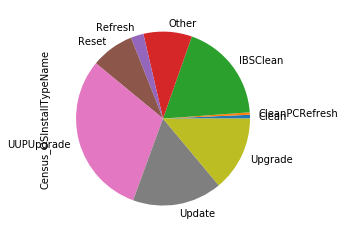

In [234]:
train.Census_OSInstallTypeName.groupby(train.Census_OSInstallTypeName).count().plot.pie()

## Census_OSInstallLanguageIdentifier
### Column[62]
### Type:
    Numeric but probably categorical

### Observations:
    We have to research what kind of data this is because maybe the number is not really a number but a label for a language.

### Policy:
    Fill missing values with the majority value and if it is categorical, we have to create more columns





In [239]:
print("Data contain "+str(countNan( train.Census_OSInstallLanguageIdentifier)) + " NaN")
train.Census_OSInstallLanguageIdentifier.groupby(train.Census_OSInstallLanguageIdentifier).count()

Data contain 24 NaN


Census_OSInstallLanguageIdentifier
1.0       34
2.0        9
3.0       41
4.0       12
5.0      117
6.0       23
7.0      238
8.0     1370
9.0      467
10.0     167
12.0       9
13.0       7
14.0     191
15.0      20
16.0       7
17.0      37
18.0      89
19.0      29
20.0      90
21.0       3
22.0       4
23.0      19
24.0      71
25.0      70
26.0     148
27.0      57
29.0     233
30.0      15
31.0      13
32.0       3
33.0      24
34.0       3
35.0      78
36.0       5
37.0     178
39.0      94
Name: Census_OSInstallLanguageIdentifier, dtype: int64

## Census_OSUILocaleIdentifier
### Column[63]
### Type:
    Numeric


### Observations:
    I don't know yet what this attribute is used for it's heavily weighted at 31. 
    I think this should be treated as a categorical value.
    To be researched, this value might have something to do with the manufactoring number.

### Policy:
    For now we can use it as a numeric until we learn what actually means




Census_OSUILocaleIdentifier
5        36
11        9
17        4
20       41
24       12
26      115
28       23
30      238
31     1365
34      467
35      174
44        9
48        7
49      192
58       20
62        7
64       37
72       90
74       29
83       90
90        4
92        4
105      19
109      71
115      69
119     151
120      58
125     233
128      16
130      13
136       4
140      24
145       3
148      79
151       5
156       6
158     181
160      94
Name: Census_OSUILocaleIdentifier, dtype: int64

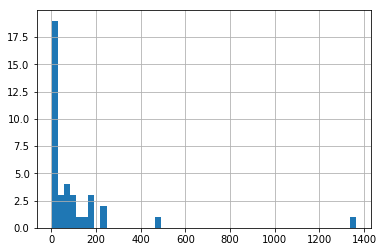

In [246]:
train.Census_OSUILocaleIdentifier.groupby(train.Census_OSUILocaleIdentifier).count().hist(bins=50)
train.Census_OSUILocaleIdentifier.groupby(train.Census_OSUILocaleIdentifier).count()

## Census_OSWUAutoUpdateOptionsName
### Column[64]
### Type:
    Categorical

### Observations:
    This variable probably will have some predicted power since it is related to patching  
    Census_OSWUAutoUpdateOptionsName
    AutoInstallAndRebootAtMaintenanceTime     169
    DownloadNotify                              6
    FullAuto                                 1740
    Notify                                    910
    Off                                        16
    UNKNOWN                                  1158

### Policy:
    Divide into columns




Census_OSWUAutoUpdateOptionsName
AutoInstallAndRebootAtMaintenanceTime     169
DownloadNotify                              6
FullAuto                                 1740
Notify                                    910
Off                                        16
UNKNOWN                                  1158
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64


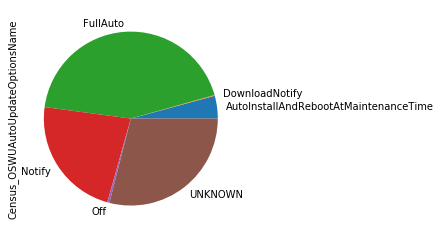

In [251]:
print(train.Census_OSWUAutoUpdateOptionsName.groupby(train.Census_OSWUAutoUpdateOptionsName).count())
train.Census_OSWUAutoUpdateOptionsName.groupby(train.Census_OSWUAutoUpdateOptionsName).count().plot.pie()

## Census_IsPortableOperatingSystem
### Column[65]
### Type:
    boolean

### Observations:
    The distribution of this variable is unbalanced, there are only 5 ocurrences. However, ALL those ocurrences have a detection. Therefore, the cut is pure in this attribute.
    Census_IsPortableOperatingSystem
    0    3994
    1       5

### Policy:
    keep this boolean for now




In [266]:
print(train.HasDetections.groupby(train.HasDetections).count())

HasDetections
0    1982
1    2017
Name: HasDetections, dtype: int64


In [265]:
train[train.columns[65:]][train.Census_IsPortableOperatingSystem==1]
print(train.Census_IsPortableOperatingSystem.groupby(train.Census_IsPortableOperatingSystem).count())

Census_IsPortableOperatingSystem
0    3994
1       5
Name: Census_IsPortableOperatingSystem, dtype: int64


## Census_GenuineStateName
### Column[66]
### Type:
    Categorical

### Observations:
    Census_GenuineStateName
    INVALID_LICENSE     353
    IS_GENUINE         3516
    OFFLINE             122
    UNKNOWN               8

### Policy:
    Divide this into columns




In [273]:
train.Census_GenuineStateName.groupby(train.Census_GenuineStateName).count()

Census_GenuineStateName
INVALID_LICENSE     353
IS_GENUINE         3516
OFFLINE             122
UNKNOWN               8
Name: Census_GenuineStateName, dtype: int64

## Census_ActivationChannel
### Column[67]
### Type:
    Categorical

### Observations:
    Census_ActivationChannel
    OEM:DM            1515
    OEM:NONSLP         148
    Retail            2148
    Retail:TB:Eval       1
    Volume:GVLK        185
    Volume:MAK           2

### Policy:
    divide this into several columns




In [274]:
train.Census_ActivationChannel.groupby(train.Census_ActivationChannel).count()

Census_ActivationChannel
OEM:DM            1515
OEM:NONSLP         148
Retail            2148
Retail:TB:Eval       1
Volume:GVLK        185
Volume:MAK           2
Name: Census_ActivationChannel, dtype: int64

## Census_IsFlightingInternal
### Column[68]
### Type:
    Boolean? only 0.0 and NaN

### Observations:
    Data has 3270 NaN
    Census_IsFlightingInternal
    0.0    729
    
    It seems to have no relation to the label of HasDetections, since the split is  the same
    It can have an indirect relation but we can add it the next iteration
    HasDetections
    0    364
    1    365
### Policy:
    Delete it from the dataset for the first iteration




In [280]:
print("Data has " + str(countNan(train.Census_IsFlightingInternal))+" NaN")
print(train.Census_IsFlightingInternal.groupby(train.Census_IsFlightingInternal).count())
c=0
flight=[]
for var in train.Census_IsFlightingInternal:
    if var==0.0:
        flight.append(c)
    c+=1

Data has 3270 NaN
Census_IsFlightingInternal
0.0    729
Name: Census_IsFlightingInternal, dtype: int64


In [284]:
train.HasDetections[flight].groupby(train.HasDetections).count()

HasDetections
0    364
1    365
Name: HasDetections, dtype: int64

## Census_IsFlightsDisabled
### Column[69]
### Type:
    Boolean? only 0.0 and NaN

### Observations:
    Data has 66 NaN
    Census_IsFlightsDisabled
    0.0    3933
    
    It doesn't seem to help
    HasDetections
    0    1952
    1    1981
### Policy:
    We can keep this column with 1 as NaN




In [290]:
print("Data has " + str(countNan(train.Census_IsFlightsDisabled))+" NaN")
print(train.Census_IsFlightsDisabled.groupby(train.Census_IsFlightsDisabled).count())
c=0
flight=[]
for var in train.Census_IsFlightsDisabled:
    if var!=0.0:
        flight.append(c)
    c+=1
train.HasDetections[flight].groupby(train.HasDetections).count()

Data has 66 NaN
Census_IsFlightsDisabled
0.0    3933
Name: Census_IsFlightsDisabled, dtype: int64


HasDetections
0    30
1    36
Name: HasDetections, dtype: int64

## Census_FlightRing
### Column[70]
### Type:
    Categorical

### Observations:
    
    Census_FlightRing
    Disabled       3
    NOT_SET      154
    RP             3
    Retail      3710
    Unknown      121
    WIF            3
    WIS            5

### Policy:
    Create separate columns for each category




In [294]:
train.Census_FlightRing.groupby(train.Census_FlightRing).count()

Census_FlightRing
Disabled       3
NOT_SET      154
RP             3
Retail      3710
Unknown      121
WIF            3
WIS            5
Name: Census_FlightRing, dtype: int64

## Census_ThresholdOptIn
### Column[71]
### Type:
    Boolean

### Observations:
    Census_ThresholdOptIn
    0.0    1470
    1.0       2
    Most values are NaN (2500)
    Name: Census_ThresholdOptIn, dtype: int64
    HasDetections
    0    1238
    1    1289
    
### Policy:
    Either add a -1 for NaN or create three columns




In [352]:
def detectionWlabel(series, val):
    c=0
    flight=[]
    for var in series:
        if str(var) ==val:
            flight.append(c)
        c+=1
    print(train.HasDetections[flight].groupby(train.HasDetections).count())
    d = train.HasDetections[flight].groupby(train.HasDetections).count()
    print(100.*d[0]/float(d[1]+d[0]))
print(train.Census_ThresholdOptIn.groupby(train.Census_ThresholdOptIn).count())
detectionWlabel(train.Census_ThresholdOptIn,'nan')

Census_ThresholdOptIn
0.0    1470
1.0       2
Name: Census_ThresholdOptIn, dtype: int64
HasDetections
0    1238
1    1289
Name: HasDetections, dtype: int64
48.99089829837752


## Census_FirmwareManufacturerIdentifier
### Column[72]
### Type:
    categorical

### Observations:
    There are 65 different firmware manufacturer Identifier. It can be a hassle to deal with 65 different columns. We can create only 2 or 3 groups

### Policy:
    Create six or seven columns based on majority manufacturers




AttributeError: 'Series' object has no attribute 'sort'

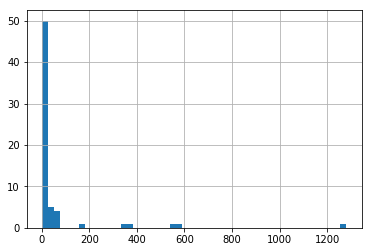

In [10]:
train.Census_FirmwareManufacturerIdentifier.groupby(train.Census_FirmwareManufacturerIdentifier).count().hist(bins=50)
print(train.Census_FirmwareManufacturerIdentifier.groupby(train.Census_FirmwareManufacturerIdentifier).count())

## Census_FirmwareVersionIdentifier
### Column[73]
### Type:
    Categorical

### Observations:
    This data is probably not helpful since the version identifiers are almost unique

### Policy:
    Delete them




In [311]:
train.Census_FirmwareVersionIdentifier.groupby(train.Census_FirmwareVersionIdentifier).count().max()


40

## Census_IsSecureBootEnabled
### Column[74]
### Type:
    boolean

### Observations:
    By itself this variable doesn't seem to have much predicted power. However, it is worth adding it. It doesn't have 'NaN' values
    Census_IsSecureBootEnabled
    0    2075
    1    1924

### Policy:
    Keep it as it is




In [315]:
print(train.Census_IsSecureBootEnabled.groupby(train.Census_IsSecureBootEnabled).count())
detectionWlabel(train.Census_IsSecureBootEnabled,'0')

Census_IsSecureBootEnabled
0    2075
1    1924
Name: Census_IsSecureBootEnabled, dtype: int64
HasDetections
0    1030
1    1045
Name: HasDetections, dtype: int64


## Census_IsWIMBootEnabled
### Column[75]
### Type:
    boolean?
    
### Observations:
    This variable it's onlu 0.0 and NaN, Most values are actually NaN
    
    Census_IsWIMBootEnabled
    0.0    1478
    NaN    2521
### Policy:
    replace NaN with '1'




In [318]:
train.Census_IsWIMBootEnabled.groupby(train.Census_IsWIMBootEnabled).count()
print(countNan(train.Census_IsWIMBootEnabled))

2521


## Census_IsVirtualDevice
### Column[76]
### Type:
    boolean

### Observations:
    Census_IsVirtualDevice
    0.0    3958
    1.0      28
    Name: Census_IsVirtualDevice, dtype: int64
    Interestingly, the virtual devices have far less infections than other machines, only 16%. It seems to be predictive
    HasDetections
    0    24
    1     4

### Policy:
    NaN have to be replaced by '0.0'




NameError: name 'train' is not defined

In [323]:
print(train.Census_IsVirtualDevice.groupby(train.Census_IsVirtualDevice).count())
detectionWlabel(train.Census_IsVirtualDevice,'1.0')
detectionWlabel(train.Census_IsVirtualDevice,'0.0')

Census_IsVirtualDevice
0.0    3958
1.0      28
Name: Census_IsVirtualDevice, dtype: int64
HasDetections
0    24
1     4
Name: HasDetections, dtype: int64
HasDetections
0    1953
1    2005
Name: HasDetections, dtype: int64


## Census_IsTouchEnabled
### Column[77]
### Type:
    Boolean

### Observations:
    It seems to be that devices with touch enabled are less likely to have detections. It doesn't have NaNs
    Census_IsTouchEnabled
    0    3526
    1     473
    Name: Census_IsTouchEnabled, dtype: int64
    
    HasDetections
    0    273
    1    200

### Policy:
    Keep it as it is
    



In [ ]:
def policy77(df):
    imputer(df[77],'mean')

In [326]:
print(train.Census_IsTouchEnabled.groupby(train.Census_IsTouchEnabled).count())
detectionWlabel(train.Census_IsTouchEnabled,'1')

    

Census_IsTouchEnabled
0    3526
1     473
Name: Census_IsTouchEnabled, dtype: int64
HasDetections
0    273
1    200
Name: HasDetections, dtype: int64


## Census_IsPenCapable
### Column[78]
### Type:
    Boolean

### Observations:
    This value seems to have at least some predictive power.
    Census_IsPenCapable
    0    3852
    1     147
    Name: Census_IsPenCapable, dtype: int64
    HasDetections
    0    87
    1    60
### Policy:
    leave it as it is




In [330]:
print(train.Census_IsPenCapable.groupby(train.Census_IsPenCapable).count())
detectionWlabel(train.Census_IsPenCapable,'1')


Census_IsPenCapable
0    3852
1     147
Name: Census_IsPenCapable, dtype: int64
HasDetections
0    87
1    60
Name: HasDetections, dtype: int64


## Census_IsAlwaysOnAlwaysConnectedCapable
### Column[79]
### Type:
    Numeric

### Observations:
    NaN have 0.34615384615384615 uninfected
    0.0 have 0.48732995465457457 uninfected
    1.0 have 0.6517857142857143  uninfected
    
    Therefore, 'NaN' can be replaced with -1
### Policy:
    Replace NaN with -1




In [341]:
print(train.Census_IsAlwaysOnAlwaysConnectedCapable.groupby(train.Census_IsAlwaysOnAlwaysConnectedCapable).count())
detectionWlabel(train.Census_IsAlwaysOnAlwaysConnectedCapable,'1.0')

Census_IsAlwaysOnAlwaysConnectedCapable
0.0    3749
1.0     224
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64
HasDetections
0    146
1     78
Name: HasDetections, dtype: int64


In [338]:
1827/(1922+1827)


0.34615384615384615

In [340]:
1827./(1922+1827)

0.48732995465457457

In [342]:
146./(146+78)

0.6517857142857143

## Wdft_IsGamer
### Column[80]
### Type:
    Numerical

### Observations:
    
    Wdft_IsGamer
    0.0    2768
    1.0    1103
    Name: Wdft_IsGamer, dtype: int64
    
    Proportion of detections with 0.0
    HasDetections
    0    1421
    1    1347
    Name: HasDetections, dtype: int64
    51.33670520231214
    
    Proportion of detections with 1.0
    HasDetections
    0    494
    1    609
    Name: HasDetections, dtype: int64
    44.786944696282866
    
    Proportion of detections with nan
    HasDetections
    0    67
    1    61
    Name: HasDetections, dtype: int64
    52.34375


### Policy:

    Replace NaN with '2'



In [353]:
print(train.Wdft_IsGamer.groupby(train.Wdft_IsGamer).count())
print("Proportion of detections with 0.0")
detectionWlabel(train.Wdft_IsGamer,'0.0')
print("Proportion of detections with 1.0")
detectionWlabel(train.Wdft_IsGamer,'1.0')
print("Proportion of detections with nan")
detectionWlabel(train.Wdft_IsGamer,'nan')

Wdft_IsGamer
0.0    2768
1.0    1103
Name: Wdft_IsGamer, dtype: int64
Proportion of detections with 0.0
HasDetections
0    1421
1    1347
Name: HasDetections, dtype: int64
51.33670520231214
Proportion of detections with 1.0
HasDetections
0    494
1    609
Name: HasDetections, dtype: int64
44.786944696282866
Proportion of detections with nan
HasDetections
0    67
1    61
Name: HasDetections, dtype: int64
52.34375


## Wdft_RegionIdentifier
### Column[81]
### Type:
    Categorical
### Observations:
    This attribute seems to have some small correspondence with the prominence of detections

### Policy:
    separate the values in dommies columns




In [358]:
train.Wdft_RegionIdentifier.groupby(train.Wdft_RegionIdentifier).count()
for x in range(15):
    detectionWlabel(train.Wdft_RegionIdentifier,str(float(1+x)))

HasDetections
0    252
1    277
Name: HasDetections, dtype: int64
47.63705103969754
HasDetections
0    18
1    14
Name: HasDetections, dtype: int64
56.25
HasDetections
0    348
1    286
Name: HasDetections, dtype: int64
54.889589905362776
HasDetections
0    29
1    27
Name: HasDetections, dtype: int64
51.785714285714285
HasDetections
0    44
1    41
Name: HasDetections, dtype: int64
51.76470588235294
HasDetections
0    33
1    48
Name: HasDetections, dtype: int64
40.74074074074074
HasDetections
0    126
1    141
Name: HasDetections, dtype: int64
47.19101123595506
HasDetections
0    51
1    61
Name: HasDetections, dtype: int64
45.535714285714285
HasDetections
0    17
1    12
Name: HasDetections, dtype: int64
58.62068965517241
HasDetections
0    399
1    423
Name: HasDetections, dtype: int64
48.54014598540146
HasDetections
0    271
1    308
Name: HasDetections, dtype: int64
46.80483592400691
HasDetections
0    36
1    43
Name: HasDetections, dtype: int64
45.56962025316456
HasDetections
0

## HasDetections
### Column[82]
### Type:


### Observations:


### Policy:




In [6]:
types=['int64','float64']
c=0
columns=[]
for x in train.dtypes:
    if str(x) in types:
        columns.append(train.columns[c])
    c+=1

In [81]:
train.filter(columns)

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,NaN,53447.0,1.0,1.0,1,18,37376.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
5,0,7.0,0,NaN,53447.0,1.0,1.0,1,97,13598.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
6,0,7.0,0,NaN,43927.0,2.0,1.0,1,78,81215.0,...,63175.0,1,NaN,0.0,0,0,0.0,0.0,10.0,1
7,0,7.0,0,NaN,53447.0,1.0,1.0,1,97,150323.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
8,0,7.0,0,NaN,53447.0,1.0,1.0,1,164,155006.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
9,0,7.0,0,NaN,46413.0,2.0,1.0,1,93,98572.0,...,63555.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1


In [13]:
train.IsBeta==1

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3969    False
3970    False
3971    False
3972    False
3973    False
3974    False
3975    False
3976    False
3977    False
3978    False
3979    False
3980    False
3981    False
3982    False
3983    False
3984    False
3985    False
3986    False
3987    False
3988    False
3989    False
3990    False
3991    False
3992    False
3993    False
3994    False
3995    False
3996    False
3997    False
3998    False
Name: IsBeta, Length: 3999, dtype: bool

In [7]:
train[columns]

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,NaN,53447.0,1.0,1.0,1,18,37376.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
5,0,7.0,0,NaN,53447.0,1.0,1.0,1,97,13598.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
6,0,7.0,0,NaN,43927.0,2.0,1.0,1,78,81215.0,...,63175.0,1,NaN,0.0,0,0,0.0,0.0,10.0,1
7,0,7.0,0,NaN,53447.0,1.0,1.0,1,97,150323.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
8,0,7.0,0,NaN,53447.0,1.0,1.0,1,164,155006.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
9,0,7.0,0,NaN,46413.0,2.0,1.0,1,93,98572.0,...,63555.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1


In [5]:
X=train.filter(columns)
Y = train.filter(items=[train.columns[-1]])
from sklearn.model_selection import train_test_split
X_train ,Y_train,X_test, Y_test = train_test_split(X,Y,test_size =0.5)


NameError: name 'columns' is not defined

In [3]:
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()
my_classifier.fit(X_train,Y_train)
prediction = my_classifier.predict(X_test)

NameError: name 'X_train' is not defined

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [51]:
train.describe

<bound method NDFrame.describe of                      MachineIdentifier   ProductName EngineVersion  \
0     0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1     000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2     000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3     00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4     000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   
5     000016191b897145d069102325cab760  win8defender   1.1.15100.1   
6     0000161e8abf8d8b89c5ab8787fd712b  win8defender   1.1.15100.1   
7     000019515bc8f95851aff6de873405e8  win8defender   1.1.15100.1   
8     00001a027a0ab970c408182df8484fce  win8defender   1.1.15200.1   
9     00001a18d69bb60bda9779408dcf02ac  win8defender   1.1.15100.1   
10    00001b3b3cf8c8c079a272ce51031753  win8defender   1.1.15100.1   
11    00001b924fcc6922321cfadbafd8a91a  win8defender   1.1.15100.1   
12    00001f26e9e5775277d6231fc6ac9e70  win8defender   1

In [44]:
correlation = train.corr()
print(correlation.columns[-1])

HasDetections


In [46]:
type (correlation)

pandas.core.frame.DataFrame

In [47]:

correlation = train.corr()
correlation.sort_values(by=[correlation.columns[-1]])


,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
AVProductsInstalled,NaN,-0.209889,0.215606,0.047015,-0.644602,1.000000,0.279777,0.039160,-0.019446,0.019899,...,0.048320,0.208283,NaN,-0.050669,-0.023199,-0.015603,-0.065056,0.026891,0.019279,-0.144223
Census_IsAlwaysOnAlwaysConnectedCapable,NaN,0.037525,-0.032735,0.096141,0.067478,-0.065056,-0.015217,0.024651,-0.001313,-0.010413,...,-0.053486,0.072510,NaN,-0.020614,0.474104,0.369860,1.000000,-0.031814,-0.001141,-0.075867
Census_IsVirtualDevice,NaN,0.013030,-0.011408,NaN,0.037061,-0.050669,-0.027777,0.008575,-0.010297,0.003006,...,-0.025490,-0.068813,NaN,1.000000,-0.002934,0.031573,-0.020614,-0.039246,0.009683,-0.060755
Census_IsTouchEnabled,NaN,0.030405,-0.020476,0.046432,0.045863,-0.023199,-0.023560,0.029590,0.007497,0.000056,...,-0.073208,0.158743,NaN,-0.002934,1.000000,0.463411,0.474104,-0.056308,0.021036,-0.059734
AVProductsEnabled,NaN,-0.027193,0.051447,0.024733,-0.094962,0.279777,1.000000,-0.033218,-0.046456,0.022732,...,0.013342,0.047432,NaN,-0.027777,-0.023560,-0.014307,-0.015217,0.005832,0.026142,-0.047272
Census_IsPenCapable,NaN,0.021207,-0.016457,0.001842,0.027430,-0.015603,-0.014307,0.019882,0.003530,0.021186,...,-0.074223,0.131059,NaN,0.031573,0.463411,1.000000,0.369860,-0.022716,-0.001802,-0.037592
OsSuite,NaN,-0.001119,0.003862,-0.078242,-0.074272,0.182483,0.042432,0.008347,0.008157,-0.000117,...,0.133743,0.463419,NaN,-0.102102,0.059756,-0.068211,0.042625,-0.020640,0.018247,-0.036925
Census_ThresholdOptIn,NaN,0.005551,-0.004437,NaN,0.018408,-0.027240,-0.005289,0.004848,-0.051284,-0.034115,...,0.031398,0.001053,NaN,-0.001925,0.042173,-0.006625,-0.009524,-0.019047,0.039047,-0.036487
IsSxsPassiveMode,NaN,-0.886657,1.000000,-0.040637,-0.088984,0.215606,0.051447,0.013781,-0.009490,-0.002097,...,-0.016018,0.012644,NaN,-0.011408,-0.020476,-0.016457,-0.032735,0.058728,0.001482,-0.027515
SMode,NaN,0.003570,-0.003059,NaN,0.009520,-0.014086,-0.002531,0.002392,-0.000415,0.019676,...,0.006532,0.024334,NaN,-0.002005,-0.008514,-0.004536,-0.005719,-0.014814,-0.022635,-0.023594


In [4]:
pd.get_dummies?

In [13]:

train=readData('train_samples.csv')
train.iloc[:,:41]
for field in train.iloc[:,:41].columns:
    nans= countNan(train[field])
    print("*"*25)
    if nans>0:
        print(field + " has "+str(nans)+' nans')
        print("*"*25)
    print(train[field].groupby(train[field]).count())
    print("*"*25)

*************************
MachineIdentifier
0000028988387b115f69f31a3bf04f09    1
000007535c3f730efa9ea0b7ef1bd645    1
000007905a28d863f6d0d597892cd692    1
00000b11598a75ea8ba1beea8459149f    1
000014a5f00daa18e76b81417eeb99fc    1
000016191b897145d069102325cab760    1
0000161e8abf8d8b89c5ab8787fd712b    1
000019515bc8f95851aff6de873405e8    1
00001a027a0ab970c408182df8484fce    1
00001a18d69bb60bda9779408dcf02ac    1
00001b3b3cf8c8c079a272ce51031753    1
00001b924fcc6922321cfadbafd8a91a    1
00001f26e9e5775277d6231fc6ac9e70    1
000024872c81cf03fa862aa8f99e0984    1
0000258d2b847c7549150cfec6464473    1
000027c68b89acb49d4017763b043449    1
000028150912f45b1dc667164de489ef    1
00002a7fd74f9ca4a59a679a7cc80388    1
00002b7454f06444e8d9f6083d8a9ebd    1
00002c6cccecdef94aaa557d0458ab8a    1
0000309dcbba938f8aa7ee5a0204119d    1
000033565d8f7a3029afd1d6c4c465e9    1
0000378813e163d00d5e5f7e0a12b6d9    1
000037f84e21c83328ba6963cdac497b    1
000038f24a1ee98931456b3e49f7934b    1
000039

SMode
0.0    3759
1.0       2
Name: SMode, dtype: int64
*************************
*************************
IeVerIdentifier has 31 nans
*************************
IeVerIdentifier
41.0       20
42.0        1
44.0        2
46.0        1
49.0        2
51.0        1
52.0        1
53.0       99
65.0        2
68.0        3
71.0       18
72.0        1
73.0        3
74.0       79
76.0       29
78.0        6
81.0        6
82.0        4
84.0        2
85.0        2
86.0        2
87.0        7
88.0        1
90.0        3
91.0        3
92.0        1
94.0       71
96.0       45
98.0      168
103.0      46
         ... 
111.0     229
114.0      10
117.0     775
135.0      82
137.0    1760
152.0       1
153.0       1
158.0       1
163.0       2
185.0       2
201.0       1
282.0       1
288.0       1
290.0       1
295.0       1
302.0       4
306.0       1
308.0       1
311.0       1
315.0       1
321.0       1
322.0       1
323.0      17
325.0       1
327.0       1
333.0      71
334.0       9
335.0     

In [473]:
t=set()

field='Census_ProcessorManufacturerIdentifier'
values=[0,1,5,10]
#values=[62773]
for x in values:
    compare(train,{field:x })
#printValues(train,field,'nan',True)

Census_ProcessorManufacturerIdentifier has  0.5 detections for  14 observations {'Census_ProcessorManufacturerIdentifier': 0}
Census_ProcessorManufacturerIdentifier has  0.49690721649484537 detections for  485 observations {'Census_ProcessorManufacturerIdentifier': 1}
Census_ProcessorManufacturerIdentifier has  0.5055730208631037 detections for  3499 observations {'Census_ProcessorManufacturerIdentifier': 5}
Census_ProcessorManufacturerIdentifier has  0.0 detections for  1 observations {'Census_ProcessorManufacturerIdentifier': 10}


In [480]:
k=15
field='Census_ProcessorModelIdentifier'
train2 = categoricalMapping(train,field,k)
for x in range(k):
    compare(train2,{field:x })


Census_ProcessorModelIdentifier has  0.0 detections for  71 observations {'Census_ProcessorModelIdentifier': 0}
Census_ProcessorModelIdentifier has  0.10638297872340426 detections for  141 observations {'Census_ProcessorModelIdentifier': 1}
Census_ProcessorModelIdentifier has  0.25728155339805825 detections for  206 observations {'Census_ProcessorModelIdentifier': 2}
Census_ProcessorModelIdentifier has  0.33098591549295775 detections for  142 observations {'Census_ProcessorModelIdentifier': 3}
Census_ProcessorModelIdentifier has  0.3869209809264305 detections for  367 observations {'Census_ProcessorModelIdentifier': 4}
Census_ProcessorModelIdentifier has  0.4665127020785219 detections for  866 observations {'Census_ProcessorModelIdentifier': 5}
Census_ProcessorModelIdentifier has  0.5 detections for  134 observations {'Census_ProcessorModelIdentifier': 6}
Census_ProcessorModelIdentifier has  0.5 detections for  112 observations {'Census_ProcessorModelIdentifier': 7}
Census_ProcessorMod

In [479]:
printValues(train,'AVProductStatesIdentifier','nan')

ZeroDivisionError: float division by zero